# Psychoinformatics - Week 5 (Exercises)
by 莊志淵 (r09921006@ntu.edu.tw)

## 進一步搜尋 Boy-Girl 版資訊 (8 points)

1. index.html 右上角 [< 上頁 ] 中包含了總頁數資訊，請用 LXML 抓出此經常變動的數字。(2 points)

In [1]:
import lxml.html
import urllib.request
u='http://www.ptt.cc/bbs/Boy-Girl/'
h={'User-Agent':'Mozilla/5.0'}
r=urllib.request.Request(u,headers=h)
data=urllib.request.urlopen(r).read()
t=lxml.html.fromstring(data.decode('utf-8'))
urn_previous_page = t.xpath('//a[contains(text(), "上頁")]')[0].attrib.get('href')
total = int(urn_previous_page.split("index")[-1].strip(".html")) + 1
print(f"總頁數: {total}")

總頁數: 5530


2. 請用 LXML 找出距離現在時間最近的一篇[爆]文標題與 URN (有可能需要翻頁) 。(3 points)

In [2]:
# search from the newest page
for idx in range(total, 0, -1):
    urn_current_page = f"http://www.ptt.cc/bbs/Boy-Girl/index{idx}.html"
    r = urllib.request.Request(urn_current_page, headers=h)
    data = urllib.request.urlopen(r).read()
    t = lxml.html.fromstring(data.decode('utf-8'))
    explode_items = t.xpath('//span[contains(text(), "爆")]')
    if explode_items:
        newest_explode_item = explode_items[-1].getparent().getnext().getchildren()[0]
        urn = newest_explode_item.attrib.get('href')
        title = newest_explode_item.text
        print(f"最近的一篇[爆]文:\n\t標題: {title}\n\tURN: {urn}")
        break

最近的一篇[爆]文:
	標題: [分享] 遠距離的終點
	URN: /bbs/Boy-Girl/M.1635574564.A.569.html


3. 請用 Selenium 在 index.html 往前翻三頁，每頁拍一張照片，在notebook內顯示。(3 points)

In [3]:
from selenium import webdriver
from IPython import display

URI='https://www.ptt.cc/bbs/Boy-Girl/index.html'
driver=webdriver.Chrome(executable_path="./chromedriver.exe")
driver.get(u)
for page in range(3):
    btn=driver.find_element_by_xpath('//a[contains(text(), "上頁")]')
    btn.click()
    driver.save_screenshot(f'after_{page + 1}_click.png')

在 index.html 往前翻第一頁


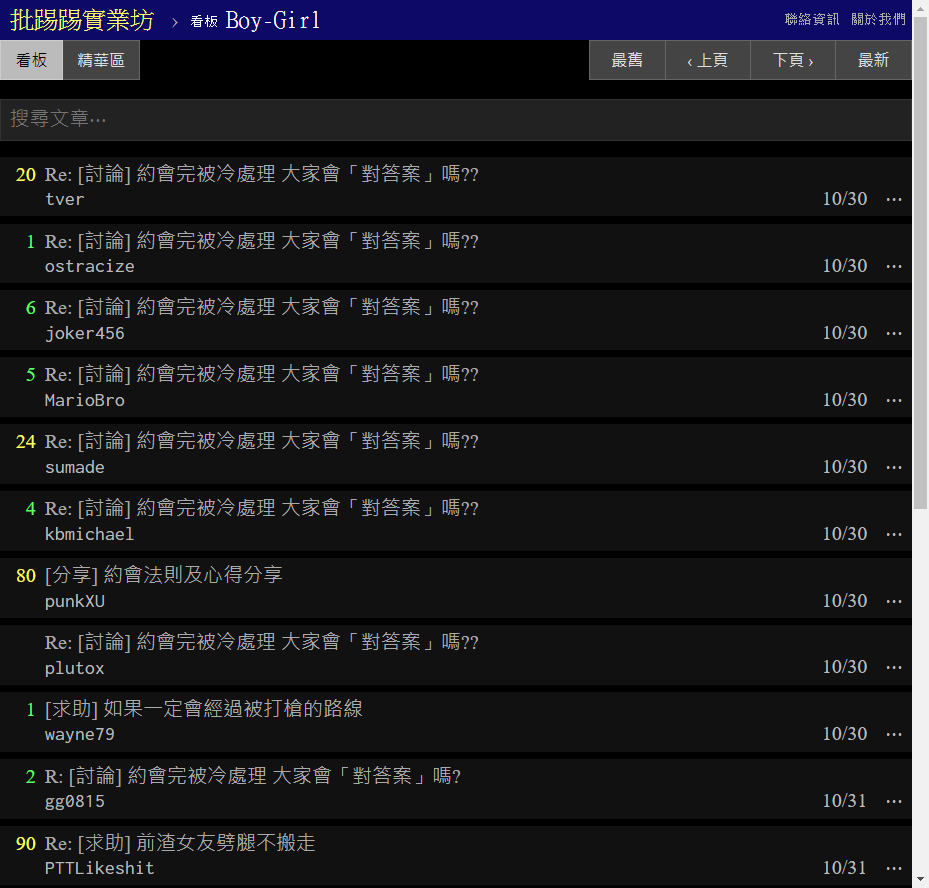

In [4]:
print("在 index.html 往前翻第一頁")
display.Image("./after_1_click.png")



在 index.html 往前翻第二頁


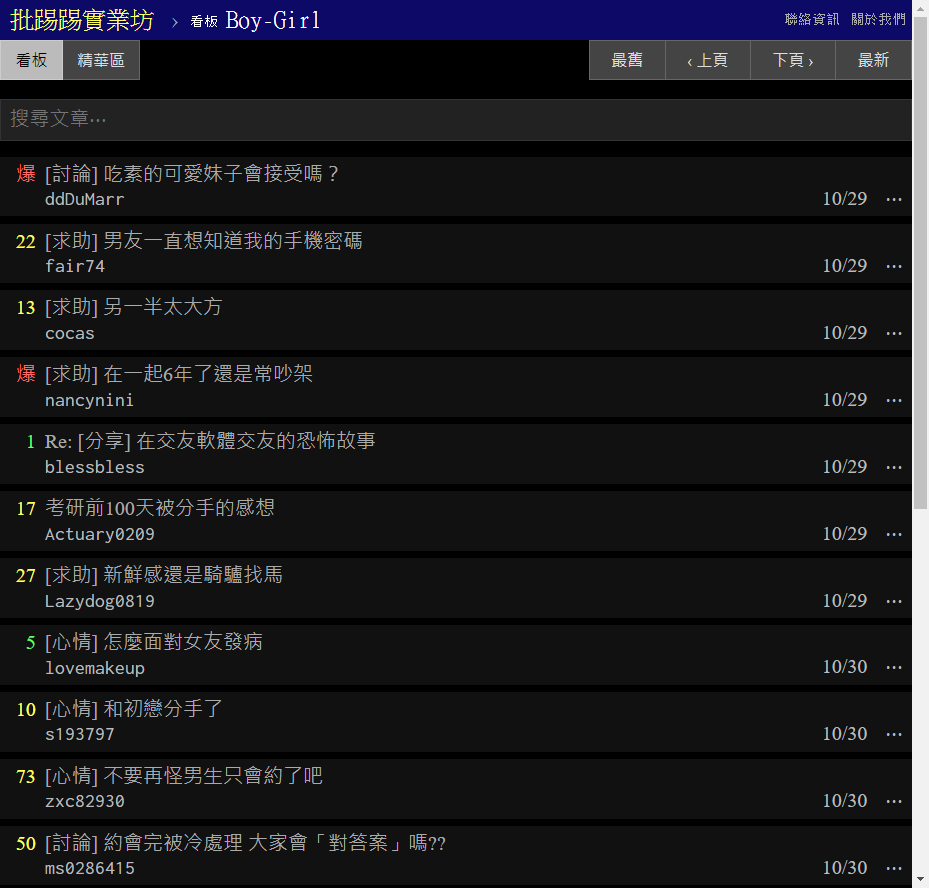

In [5]:
print("\n\n在 index.html 往前翻第二頁")
display.Image("./after_2_click.png")



在 index.html 往前翻第三頁


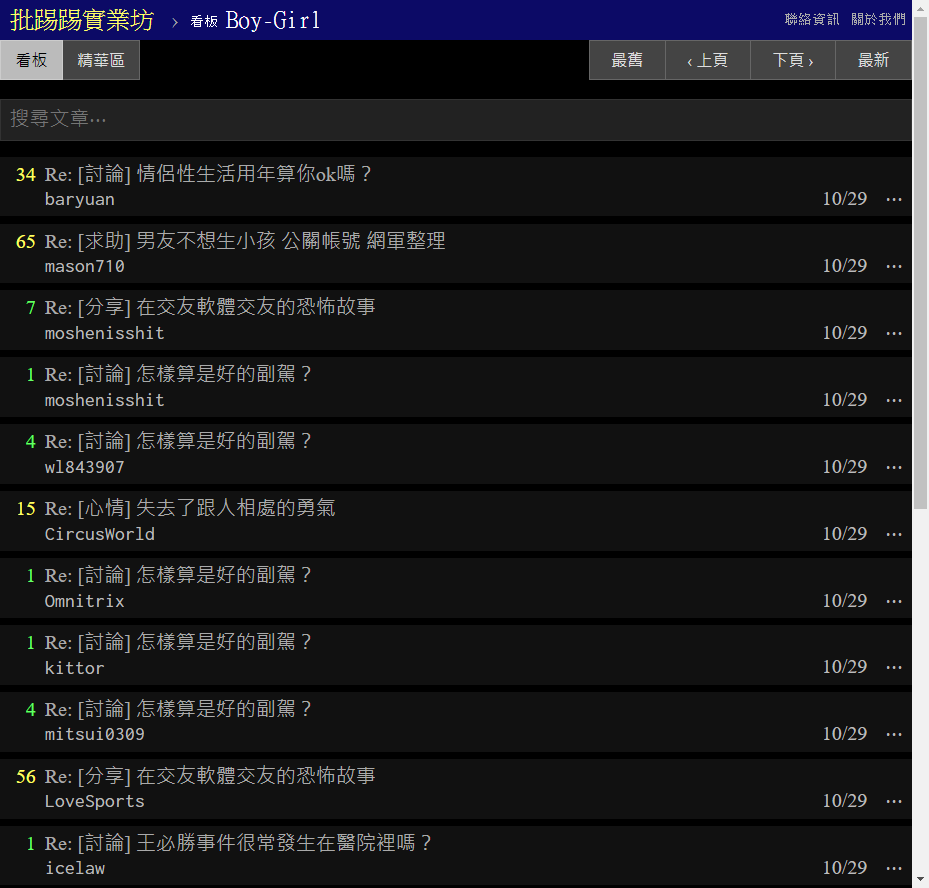

In [6]:
print("\n\n在 index.html 往前翻第三頁")
display.Image("./after_3_click.png")

### Please the HTML version before next Monday (11/1).